## Seaborn package

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
sns.__version__

'0.12.2'

In [4]:
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')       
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')       # 여객 운송 데이터
mpg = sns.load_dataset('mpg')               # Mile Per Galon 데이터

- 1차원 분포

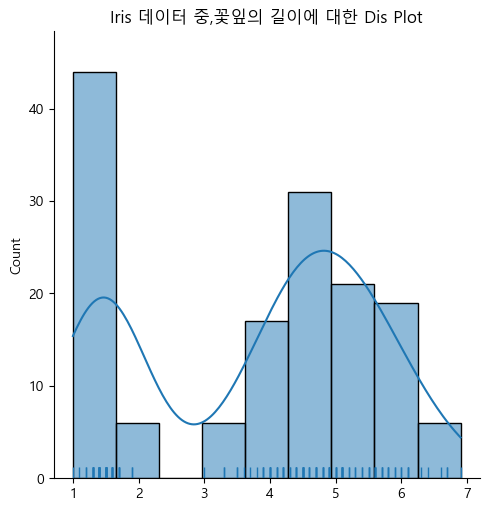

In [5]:
# displot(distribution plot)
x = iris.petal_length.values
sns.displot(x, kde=True, rug=True)
plt.title("Iris 데이터 중,꽃잎의 길이에 대한 Dis Plot")
plt.show()

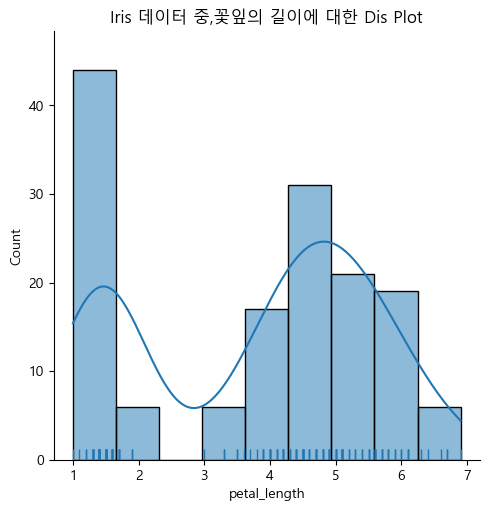

In [6]:
sns.displot(x='petal_length', kde=True, rug=True, data=iris)
plt.title("Iris 데이터 중,꽃잎의 길이에 대한 Dis Plot")
plt.show()

- 카운트 플롯

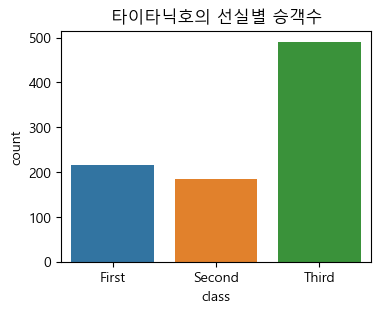

In [7]:
plt.figure(figsize=(4,3))
sns.countplot(data=titanic, x='class')
plt.title('타이타닉호의 선실별 승객수')
plt.show()

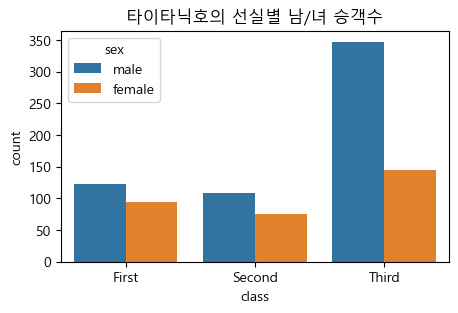

In [8]:
plt.figure(figsize=(5,3))
sns.countplot(data=titanic, x='class', hue='sex')   # palette='plasma'와 같이 colormap을 지정할 수 있음
plt.title('타이타닉호의 선실별 남/녀 승객수')
plt.show()

- 다차원 실수 데이터

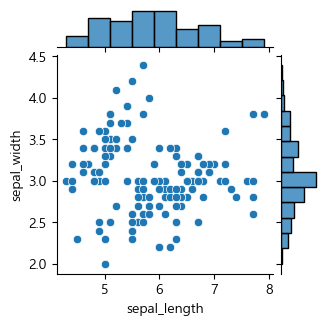

In [9]:
# joint plot
fig = sns.jointplot(data=iris, x='sepal_length', y='sepal_width')
fig.fig.set_size_inches(3, 3)
plt.show()

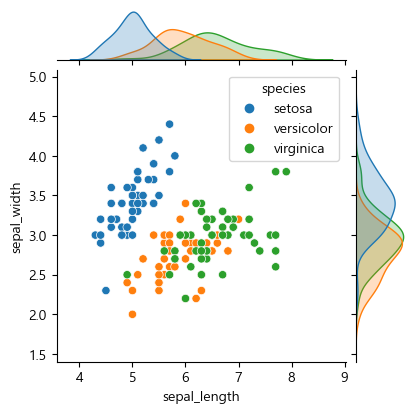

In [10]:
# joint plot을 좀더 세련되게
fig = sns.jointplot(data=iris, x='sepal_length', y='sepal_width', hue='species')
fig.fig.set_size_inches(4, 4)
plt.show()

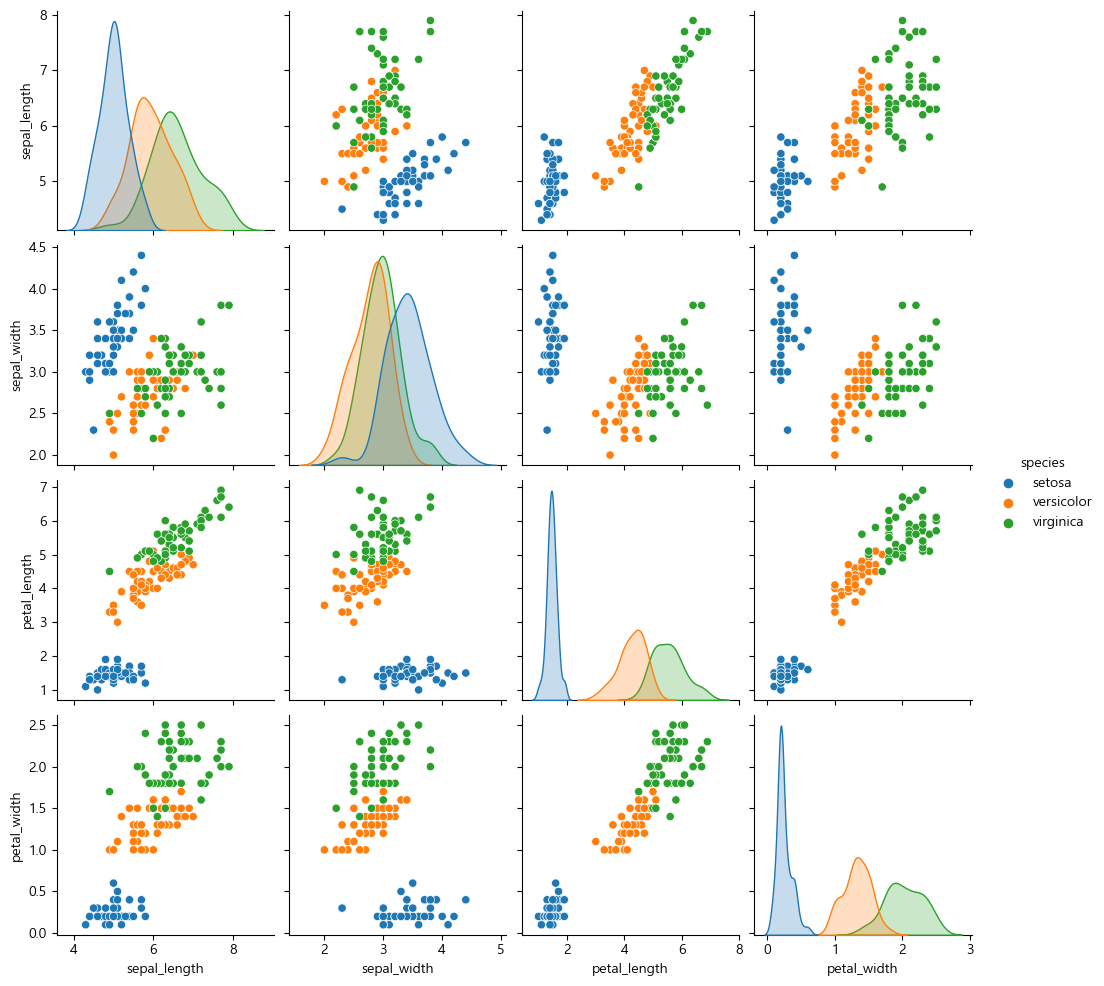

In [11]:
# pair plot
sns.pairplot(data=iris, hue='species');

- 다차원 카테고리 데이터

In [12]:
# 타이타닉호의 선실별 남/녀 승객수
titanic.groupby(['class','sex'])['survived'].count()

class   sex   
First   female     94
        male      122
Second  female     76
        male      108
Third   female    144
        male      347
Name: survived, dtype: int64

In [13]:
dt = titanic.pivot_table('survived', 'class', 'sex', 'count')
dt

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


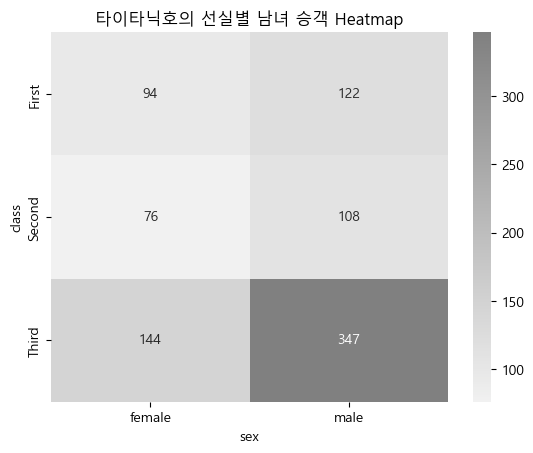

In [14]:
sns.heatmap(dt, cmap=sns.light_palette('gray', as_cmap=True),
            annot=True, fmt='d')
plt.title('타이타닉호의 선실별 남녀 승객 Heatmap');

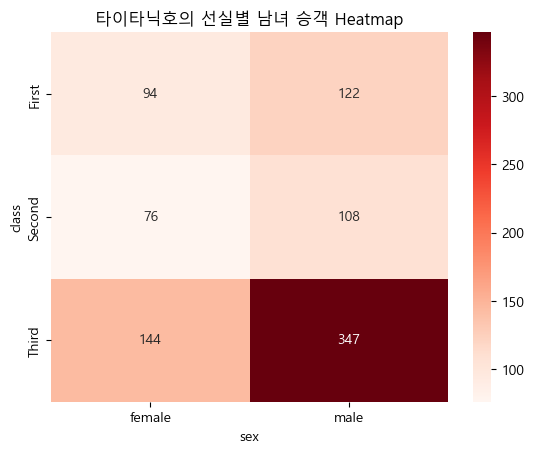

In [15]:
sns.heatmap(dt, cmap='Reds', annot=True, fmt='d')
plt.title('타이타닉호의 선실별 남녀 승객 Heatmap');

In [16]:
flights.tail()

,year,month,passengers
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


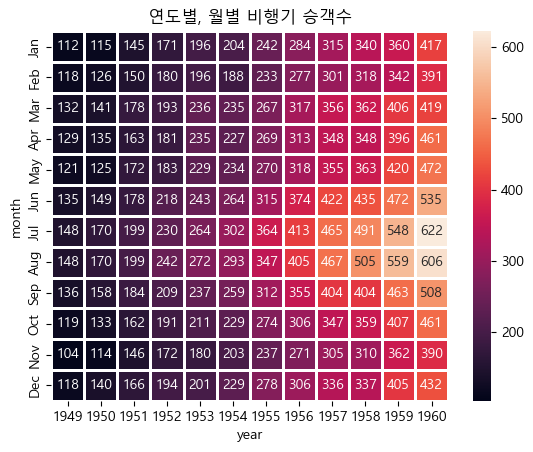

In [17]:
passengers = flights.pivot(index='month', columns='year', values='passengers')
sns.heatmap(passengers, annot=True, fmt='d', linewidths=1)
plt.title('연도별, 월별 비행기 승객수');

- 다차원 복합 데이터 - barplot

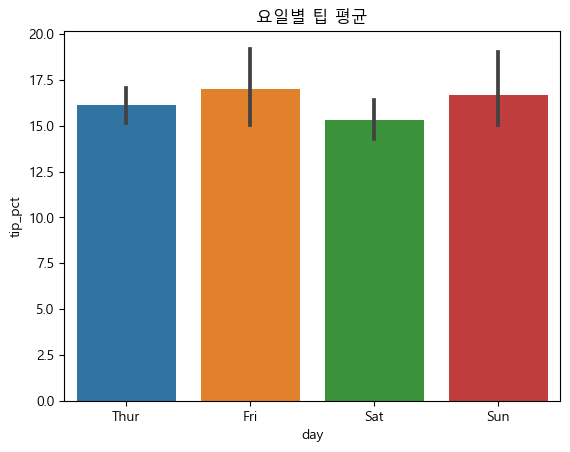

In [18]:
tips['tip_pct'] = (tips.tip / tips.total_bill * 100).round(2)
sns.barplot(tips, x='day', y='tip_pct')
plt.title('요일별 팁 평균');

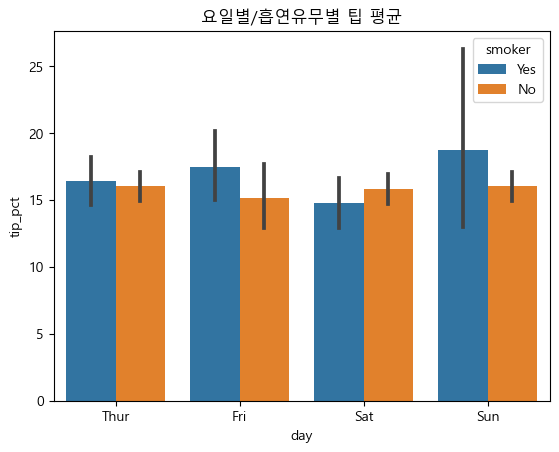

In [19]:
sns.barplot(tips, x='day', y='tip_pct', hue='smoker')
plt.title('요일별/흡연유무별 팁 평균');

In [20]:
##################################################################
mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [21]:
# 제조사별 평균 mpg
mpg['manufacturer'] = mpg.name.apply(lambda x: x.split()[0])
mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,ford
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,vw
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,dodge
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,ford
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10,chevy


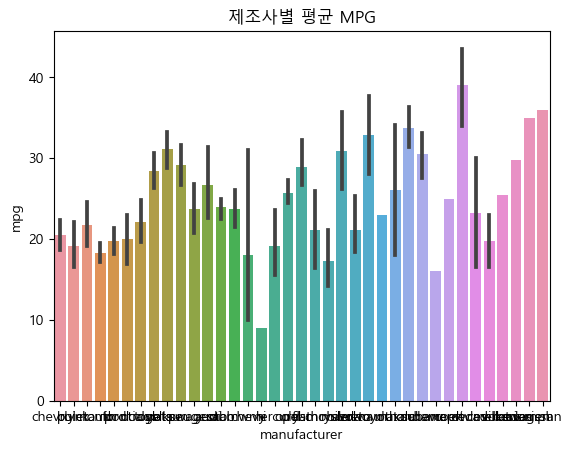

In [22]:
sns.barplot(mpg, x='manufacturer', y='mpg')
plt.title('제조사별 평균 MPG');

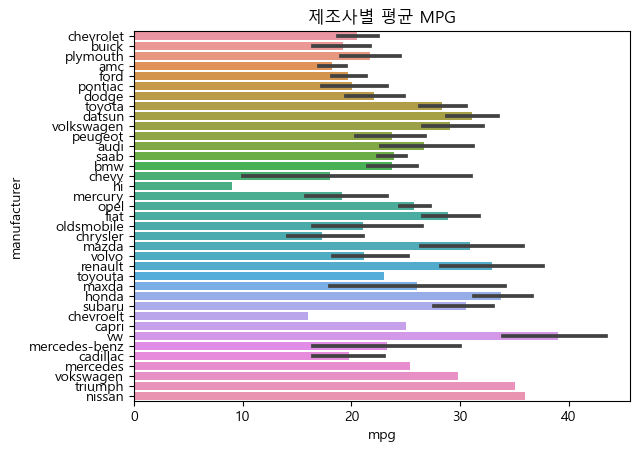

In [23]:
# x와 y를 바꿔주면 수평 막대그래프가 됨
sns.barplot(mpg, y='manufacturer' , x='mpg')
plt.title('제조사별 평균 MPG');

- boxplot

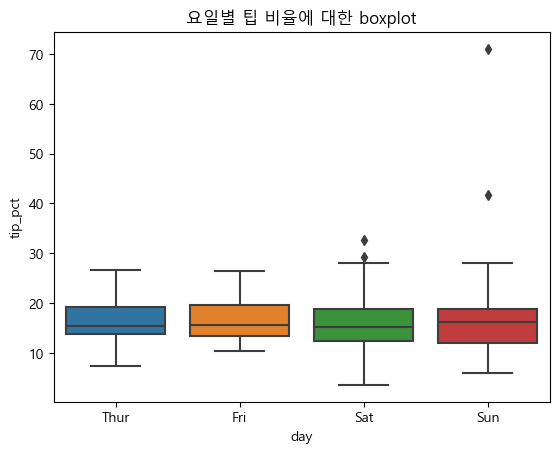

In [24]:
# 요일별 팁의 비율
sns.boxplot(tips, x='day', y='tip_pct')
plt.title('요일별 팁 비율에 대한 boxplot');

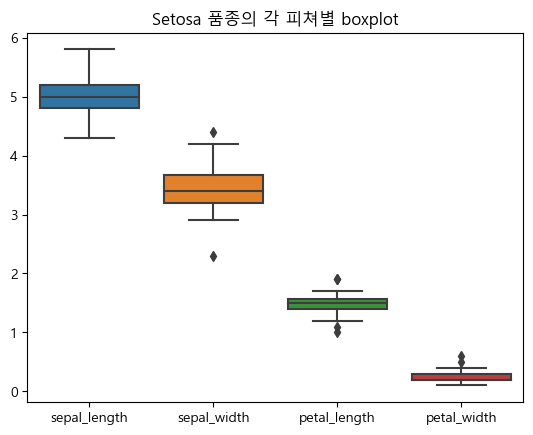

In [25]:
# Iris data
sns.boxplot(iris[iris.species == 'setosa'])
plt.title('Setosa 품종의 각 피쳐별 boxplot');

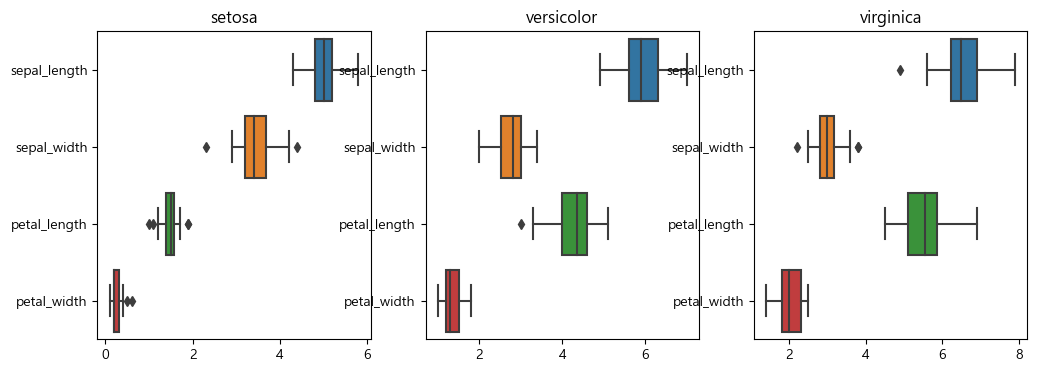

In [26]:
# Iris 모든 품종별 각 피처들의 boxplot
plt.figure(figsize=(12,4))
for i, species in enumerate(iris.species.unique()):
    plt.subplot(1, 3, i+1)
    sns.boxplot(iris[iris.species == species], orient='horizontal')
    plt.title(species)
plt.show()

- regplot(regression plot)

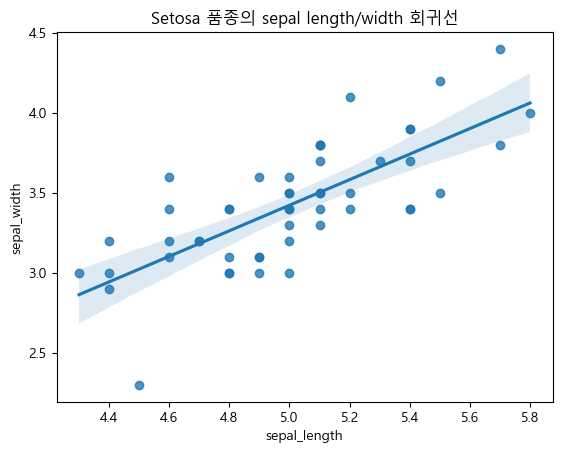

In [27]:
sns.regplot(data=iris[iris.species == 'setosa'], x='sepal_length',y='sepal_width')
plt.title('Setosa 품종의 sepal length/width 회귀선');

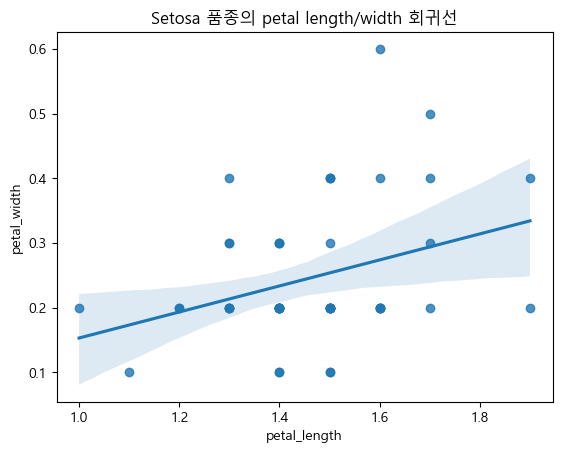

In [28]:
sns.regplot(data=iris[iris.species == 'setosa'], x='petal_length',y='petal_width')
plt.title('Setosa 품종의 petal length/width 회귀선');

In [29]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


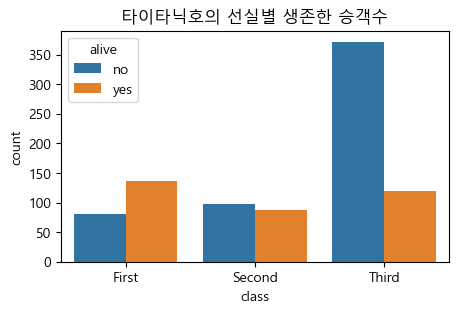

In [30]:
plt.figure(figsize=(5,3))
sns.countplot(data=titanic, x='class', hue='alive')   
plt.title('타이타닉호의 선실별 생존한 승객수')
plt.show()

In [31]:
a = titanic[titanic['class'] == 'First'].survived.sum()
b = titanic[titanic['class'] == 'Second'].survived.sum()
c = titanic[titanic['class'] == 'Third'].survived.sum()

In [51]:
a,b,c
labels = [titanic[titanic[['class']]('First')]]
labels

TypeError: 'DataFrame' object is not callable

ValueError: 'label' must be of length 'x'

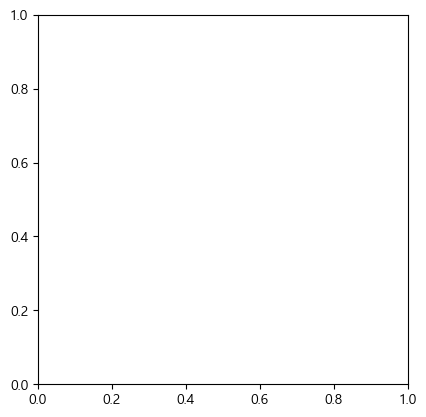

In [35]:
ratio = [a,b,c]
plt.pie(ratio , labels=labels, autopct='%.1f%%')
plt.title('파이 차트')
plt.show()